# Finding the Best Markets to Advertise In

## Table of Contents

* [Introduction](#intorduction)
* [Goal](#goal)
* [Summary](#summary)
* [The Data](#the_data)
  * [Understanding the Data](#understanding_the_data)
  * [Checking for Sample Representativity](#checking_for_sample_representativity)
* [Analysis](#analysis)
  * [New Coders - Locations and Densities](#new_coders)
  * [Spending Money for Learning](#spending_money_for_learning)
  * [Dealing with Extreme Outliers](#dealing_with_extreme_outliers)
    * [Canada Outliers](#canada_outliers)
    * [India Outliers](#india_outliers)
    * [USA Outliers](#usa_outliers)
    * [Data after removing outliers](#data_after_removing_outliers)
  * [Choosing the Two Best Markets](#choosing_the_two_best_markets)
    * [Splitting our budget unequally](#splitting_out_budget_unequally)
* [Conclusion](#conclusion)

## Introduction  <a name="introduction"></a>

We're an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement.

## Goal  <a name="goal"></a>

Find out the two best markets to advertise our product in.

## Summary  <a name="summary"></a>

The two best markets to advertise in are the US and India. We'll let the marketing team decide on the best way to split our advertising budget between the two.

## The Data  <a name="the_data"></a>

In this project we'll be using [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run [a popular Medium publication](https://medium.freecodecamp.org/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

### Understanding the Data  <a name="understanding_the_data"></a>

The following is some boilerplate code that loads the required libraries, reads the data and displays some initial information about it:

In [44]:
import pandas as pd
import numpy as np
# Reading the file, specifying types for 'CodeEventOther' and 'JobInterestOther', since pandas cannot discern them by itself
survey_data = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", dtype={"CodeEventOther": str, "JobInterestOther": str})

# Allow Jupyter notebook to generate plots and use the FiveThirtyEight style
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [45]:
survey_data.shape

(18175, 136)

The dataset has 18,175 entires each with 136 columns of data.
To avoid truncating the data, we'll make sure that Jupyter displays all the columns when printing the dataset:

In [46]:
pd.options.display.max_columns = 150 

In [47]:
survey_data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

Well, that doesn't tell us much, since most of the data in the columns is NaN. 
Let's get some info on the dataset:

In [48]:
survey_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 136 columns):
Age                              15367 non-null float64
AttendedBootcamp                 17709 non-null float64
BootcampFinish                   1069 non-null float64
BootcampLoanYesNo                1079 non-null float64
BootcampName                     949 non-null object
BootcampRecommend                1073 non-null float64
ChildrenNumber                   2314 non-null float64
CityPopulation                   15354 non-null object
CodeEventConferences             1609 non-null float64
CodeEventDjangoGirls             165 non-null float64
CodeEventFCC                     1708 non-null float64
CodeEventGameJam                 290 non-null float64
CodeEventGirlDev                 297 non-null float64
CodeEventHackathons              1977 non-null float64
CodeEventMeetup                  2472 non-null float64
CodeEventNodeSchool              446 non-null float64
CodeEventNone 

Many of the columns have a large number of null values. We'd need to address that when it's time to clean the data.
Most column names are self-explanatory; for the rest we can read [raw data](https://github.com/freeCodeCamp/2017-new-coder-survey/tree/master/raw-data) of the survey to get the initial survey question asked.

### Checking for Sample Representativity  <a name="checking_for_sample_representativity"></a>

For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

* Where are these new coders located?
* What are the locations with the greatest number of new coders?
* How much money new coders are willing to spend on learning?

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

Let's look at the frequency distribution of the `JobRoleInterest` column, since it describes the role(s) each participant is interested in:

In [49]:
survey_data['JobRoleInterest'].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

Quite a few of the participants are interested in more than one subject, so that table isn't very helpful.
In fact, let's look at the frequency distribution of the number of subjects each participant is interesed in:

In [50]:
number_of_subjects = survey_data['JobRoleInterest'].dropna().str.count(',') + 1
number_of_subjects_freq = number_of_subjects.value_counts(normalize=True) * 100

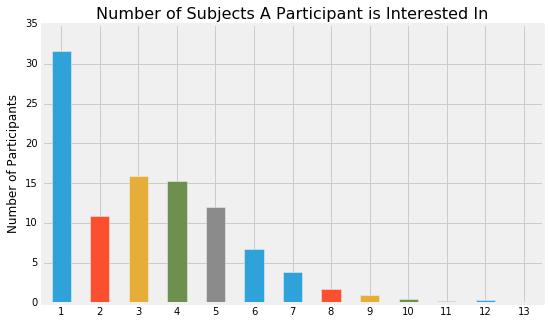

In [51]:
number_of_subjects_freq.sort_index().plot.bar(figsize=(8,5), rot=0)
plt.title("Number of Subjects A Participant is Interested In", fontsize=16)
plt.ylabel("Number of Participants")
plt.show()

So it seems that only about 32% of the participants have an interest in only one subject and the rest are looking at anywhere between 2 and 13 subjects.
Since the subjects we're interested in for this project are web and mobile development, let's see how many people would like to pursue a career in at least one of them:

In [52]:
relevant_subjects = ['Back-End Web Developer', 'Front-End Web Developer', 'Full-Stack Web Developer', 'Mobile Developer']
pattern = '|'.join(relevant_subjects)

survey_data['MobileOrWebInterest'] = survey_data['JobRoleInterest'].str.contains(pattern)

True     86.241419
False    13.758581
Name: MobileOrWebInterest, dtype: float64


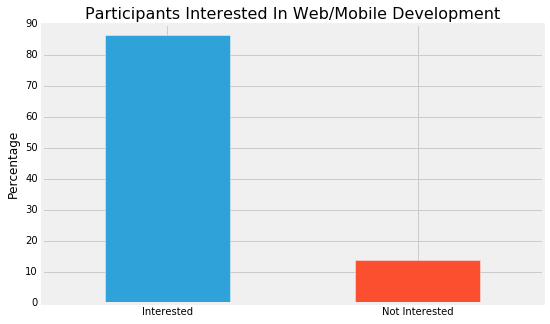

In [53]:
web_or_mobile_interest = survey_data['MobileOrWebInterest'].value_counts(normalize=True) * 100
print(web_or_mobile_interest)
web_or_mobile_interest.sort_index(ascending=False).plot.bar(figsize=(8,5), rot=0)
plt.title("Participants Interested In Web/Mobile Development", fontsize=16)
plt.xticks([0, 1],['Interested', 'Not Interested'])
plt.ylabel('Percentage')
plt.show()

It turns out that about 86% of the participants are interested in a career in at least one of these subjects. That's good news, since it strongly suggests that this sample is representative, as our goal is advertising to people interested in these subjects.

## Analysis  <a name="analysis"></a>

As a first step in our analysis phase, we'd like to figure out what are the best markets to advertise in.
To do that we'll answer 2 questions:
* Where are most of the coders located?
* How much money are people willing to spend no our courses?

### New Coders - Locations and Densities  <a name="new_coders"></a>

The dataset holds information on the country that each participant lives in (`CountryLive`), and that's the most granular location information we have. Therefore we can think of wach country as its own market, and reframe our goal as finding the top two countries to advertise in.
How will we know what are the top countries in that aspect? We'll look at the number of potential customers - the more people are likely to sign up to our courses, the better.

We'll start with cleaning the dataset by dropping all rows where participants didn't answer what role they're interested in. Without that information we don't know their interests, so their answers are irrelevant to us for the project's purposes.

In [54]:
relevant_survey_data = survey_data[survey_data['JobRoleInterest'].notna()].copy()

Now we can generate frequency tables for the `CountryLive` column, to gain some understanding of where our participants live:

In [55]:
absolute = relevant_survey_data['CountryLive'].value_counts()
relative = relevant_survey_data['CountryLive'].value_counts(normalize=True) * 100
pd.DataFrame(data = {'Absolute frequency': absolute, 'Percentage': relative})


,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


The participants come from all over the globe (137 countries), but the vast majority of them come from USA and India (45.7% and 7.73%, respectively).
However, before assuming these are the top two countries for investment, we better check the participats' willingness to spend money on our courses. There's no point in advertising in a market that's interested in our courses, but not interested enough to actually buy them.

### Spending Money for Learning  <a name="spending_money_for_learning"></a>

The `MoneyForLearning` column describes the amount of money (In USD) spent by participants from the moment they started coding until the moment they completed the survey.
Since our subscriptions are monthly we need to figure out how much money each student spends per month.

We'll be looking at only 4 countries  in this analysis - USA, India, The UK and Canada, and that's for two reasons:
* These are the countries with the highest frequencies in our sample (about 62% of all participants come from these countries)
* These are all English-speaking countries, which increases the chances that our ads will target the right individuals, as our courses are written in English

In [56]:
# To make sure we're not dividing by 0, we're making the minimum amount a person has programmed 1 month
relevant_survey_data['MonthsProgramming'].replace(0, 1, inplace=True) 

relevant_survey_data['MoneyPerMonth'] = relevant_survey_data['MoneyForLearning'] / relevant_survey_data['MonthsProgramming']

Do all rows have relevant data?

In [57]:
relevant_survey_data['MoneyPerMonth'].value_counts(dropna=False)

 0.000000        3092
NaN               675
 50.000000        128
 25.000000        120
 16.666667        118
 100.000000       118
 33.333333        109
 8.333333         105
 20.000000         88
 10.000000         83
 83.333333         80
 166.666667        67
 12.500000         66
 4.166667          65
 5.000000          62
 200.000000        53
 500.000000        50
 66.666667         47
 41.666667         46
 250.000000        44
 1000.000000       43
 3.333333          38
 20.833333         37
 125.000000        36
 6.666667          35
 2.500000          33
 5.555556          31
 150.000000        31
 333.333333        31
 11.111111         31
                 ... 
 1.562500           1
 29.000000          1
 23.000000          1
 19.000000          1
 31.000000          1
 3.625000           1
 4.750000           1
 92.000000          1
 117.500000         1
 4.687500           1
 1142.857143        1
 0.900000           1
 866.666667         1
 1.344086           1
 1670.0000

Apparently not. Let's drop all Null values, and while we're at it, also drop all `CountryLive` Null values:

In [58]:
relevant_survey_data = relevant_survey_data[relevant_survey_data['MoneyPerMonth'].notna() & relevant_survey_data['CountryLive'].notna()].copy()

Let's find out how much money a student spends on average each month in the US, India, The UK and Canada:

In [59]:
relevant_countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
grouped_data = relevant_survey_data.groupby('CountryLive').mean()['MoneyPerMonth'][relevant_countries]
grouped_data

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

Being that the socioeconomic status of both Canada and the UK is higher than that of India (Looking at [GNI per capita](https://datatopics.worldbank.org/world-development-indicators/the-world-by-income-and-region.html)), it's quite surprising to learn the residents of these countries are less willing to spend money on programming courses than residents of India. 
There are several explanations to this finding:
* It could be that residents of India consider programming much highly than residents of UK or Canada. Perhaps they see it as an opportunity for social mobility, or maybe there are fewer high-paying career options in India than in the other countries.
* Maybe our data from the UK and Canada isn't representative. The data is based on the replies of 315 participants from the UK and 260 from Canada, and in these numbers outliers or false answers may have a significant impact on the final results
* Finally, the results may be representative after all

Next we'll see if there are outliers to remove from the data.

### Dealing with Extreme Outliers  <a name="dealing_with_extreme_outliers"></a>

In [60]:
relevant_countries_data = relevant_survey_data[relevant_survey_data['CountryLive'].isin(relevant_countries)]

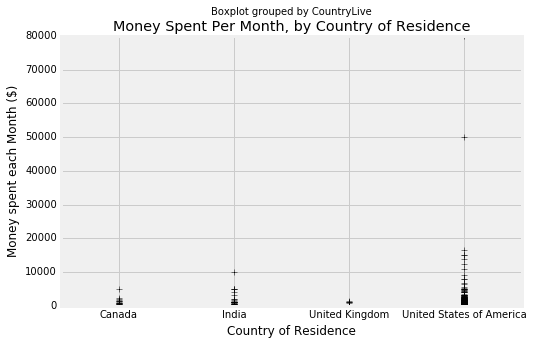

In [61]:
relevant_countries_data.boxplot(column='MoneyPerMonth', by='CountryLive', figsize=(8,5))
plt.xlabel('Country of Residence')
plt.ylabel('Money spent each Month ($)')
plt.title('Money Spent Per Month, by Country of Residence')
plt.show()

Looking at the graph we can see several outliers, but the most extreme ones have to be the participants who spend $50,000 and over each month. Before we take a closer look at the box plot, let's remove them from the dataset: 

In [62]:
relevant_countries_data = relevant_countries_data[relevant_countries_data['MoneyPerMonth'] < 50000]

Let's see the box plot again:

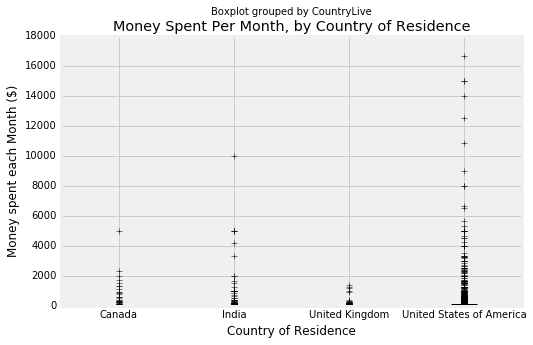

In [63]:
relevant_countries_data.boxplot(column='MoneyPerMonth', by='CountryLive', figsize=(8,5))
plt.xlabel('Country of Residence')
plt.ylabel('Money spent each Month ($)')
plt.title('Money Spent Per Month, by Country of Residence')
plt.show()

Looks like we have some outliers still, mainly in Canada, India and the USA.
Let's investigate them, by country:

#### Canada Outliers  <a name="canada_outliers"></a>

In [64]:
canada_outliers = relevant_countries_data[(relevant_countries_data['CountryLive'] == 'Canada') & (relevant_countries_data['MoneyPerMonth'] > 4000)]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MobileOrWebInterest,MoneyPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,True,5000.0


That participant spent a large sum of money up front to enroll in a programming program and has been programming no more than two months when they completed the survey. Since they're probably not going to spend more money the next few months, this can be considered an outlier, so we'll  remove it from the dataset. 

In [65]:
relevant_countries_data = relevant_countries_data.drop(canada_outliers.index)

#### India Outliers  <a name="india_outliers"></a>

In [66]:
india_outliers = relevant_countries_data[(relevant_countries_data['CountryLive'] == 'India') & (relevant_countries_data['MoneyPerMonth'] > 2000)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MobileOrWebInterest,MoneyPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0

All of these participants never attended a programming bootcamp, so it could be that the money they reportedly spent on learning was spent on university tuition. Since the question of the survey was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", these replies can be considered irrelevant and we can safely remove them.

In [67]:
relevant_countries_data = relevant_countries_data.drop(india_outliers.index)

#### USA Outliers  <a name="usa_outliers"></a>

Even after removing two extreme values, the US has still got quite a few outliers. Let's look at them more closely: 

In [68]:
usa_outliers = relevant_countries_data[(relevant_countries_data['CountryLive'] == 'United States of America') & (relevant_countries_data['MoneyPerMonth'] > 6000)]
usa_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MobileOrWebInterest,MoneyPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,N

From the 11 survey responses in this dataframe, 5 never attended a programming bootcamp. Let's look at the remaining 6:

In [69]:
usa_outliers[usa_outliers['AttendedBootcamp'] == 1][['MoneyForLearning', 'MonthsProgramming']]

,MoneyForLearning,MonthsProgramming
718,8000.0,1.0
1222,13000.0,2.0
3184,9000.0,1.0
6805,15000.0,1.0
7505,20000.0,3.0
9778,8000.0,1.0


We see that these participants have been programming no more than 3 months. Similar to the Canada outlier, we'll assume that they paid a large sum ahead and won't spend more on programming the coming months, so the sum paid per month will naturally be lower. 

Let's remove these outliers from the dataset:

In [70]:
relevant_countries_data = relevant_countries_data.drop(usa_outliers.index)

#### Data after removing outliers  <a name="data_after_removing_outliers"></a>

Let's take another look at the data after removing the outliers above:

In [71]:
grouped_data = relevant_countries_data.groupby('CountryLive').mean()['MoneyPerMonth']
grouped_data

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneyPerMonth, dtype: float64

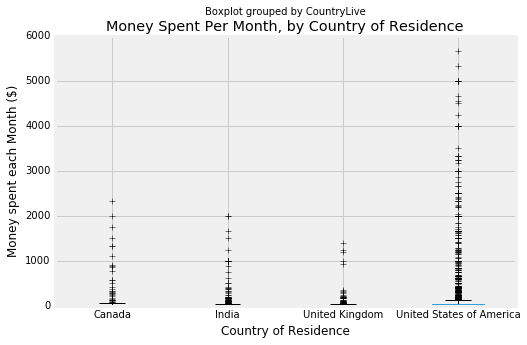

In [72]:
relevant_countries_data.boxplot(column='MoneyPerMonth', by='CountryLive', figsize=(8,5))
plt.xlabel('Country of Residence')
plt.ylabel('Money spent each Month ($)')
plt.title('Money Spent Per Month, by Country of Residence')
plt.show()

### Choosing the Two Best Markets  <a name="choosing_the_two_best_markets"></a>

From the 4 countries we deemed relevant, an first obvious choice is the USA. It's got the largest number of participants, and the highest average monthly spend on learning.
The second market is a bit of a toss-up between India and Canada. On the one hand, India has about X2 participants than Canda, but on the other - participants from Canada are willing to pay much more on learning than ones from India.

However, given that India's average monthly spend on learning is still less than our subscriptions costs of $59, India looks like a good choice for a second market for advertising.

#### Splitting our budget unequally  <a name="splitting_out_budget_unequally"></a>

Let's do some naive calculations to gauge the expected revenue from the US and India:

In [73]:
us_revenue = grouped_data.loc['United States of America'] * relevant_countries_data['CountryLive'].value_counts()['United States of America']
print("Expected revenue from the US: ", us_revenue)
india_revenue = grouped_data.loc['India'] * relevant_countries_data['CountryLive'].value_counts()['India']
print("Expected revenue from India: ", india_revenue)
print("Ratio between expected revenues: ", us_revenue / india_revenue)


Expected revenue from the US:  416551.4551413734
Expected revenue from India:  30051.754650924788
Ratio between expected revenues:  13.861135896387827


The expected revenue from the US is almost 14 times as high as the India one. It's worth considering we split our advertising budget accordingly, or even keep India out of our advertising entirely and focus solely on the US.

These are decisions best left to the marketing team, who hold domain knowledge in this area.

## Conclusion  <a name="conclusion"></a>

In this project we used the data from a survey filled by new coders from all over the world to learn where most new coders are located, and how much are they willing to spend on learning, in order to find the best markets to advertise in.

After analyzing the data of participants who live in 4 large English-speaking countries (the US, Canada, the UK and India) we decided that the best markets for this purpose are the US and India. 
We also decided to let the marketing team use their domain knowledge to decide on the best strategy to split the advertising budget between both markets.